## Pretrained CNN: *transfer learning*

Nature article: [Dermatologist-level classification of skin cancer with deep neural networks](http://www.nature.com/nature/journal/v542/n7639/full/nature21056.html)

In [1]:
import dogs_vs_cats as dvc
all_files = dvc.image_files()

Using Theano backend.


data file train.zip has already been downloaded
Data has already been extracted


## Imagenet pretrained models

In [3]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')

input_image_shape = (3,224,224)
img_path = all_files[10]
img = image.load_img(img_path, target_size=input_image_shape[1:])
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)

In [4]:
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=5))

Predicted: [[('n02127052', 'lynx', 0.30935207), ('n02124075', 'Egyptian_cat', 0.28828681), ('n02119789', 'kit_fox', 0.08999259), ('n02123045', 'tabby', 0.084158279), ('n02123597', 'Siamese_cat', 0.047891844)]]


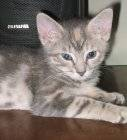

In [5]:
from IPython.display import Image
Image(img_path)

In [6]:
print(preds.shape)

(1, 1000)


In [7]:
from keras.applications.imagenet_utils import CLASS_INDEX
# Imagenet 1000 classes
CLASS_INDEX

{'735': ['n03980874', 'poncho'],
 '998': ['n13133613', 'ear'],
 '492': ['n03014705', 'chest'],
 '777': ['n04141327', 'scabbard'],
 '624': ['n03661043', 'library'],
 '27': ['n01631663', 'eft'],
 '351': ['n02422106', 'hartebeest'],
 '163': ['n02088466', 'bloodhound'],
 '352': ['n02422699', 'impala'],
 '3': ['n01491361', 'tiger_shark'],
 '95': ['n01843065', 'jacamar'],
 '390': ['n02526121', 'eel'],
 '500': ['n03042490', 'cliff_dwelling'],
 '121': ['n01981276', 'king_crab'],
 '136': ['n02017213', 'European_gallinule'],
 '996': ['n13052670', 'hen-of-the-woods'],
 '586': ['n03478589', 'half_track'],
 '48': ['n01695060', 'Komodo_dragon'],
 '149': ['n02074367', 'dugong'],
 '73': ['n01773549', 'barn_spider'],
 '142': ['n02033041', 'dowitcher'],
 '329': ['n02321529', 'sea_cucumber'],
 '25': ['n01629819', 'European_fire_salamander'],
 '442': ['n02825657', 'bell_cote'],
 '587': ['n03481172', 'hammer'],
 '371': ['n02486261', 'patas'],
 '81': ['n01796340', 'ptarmigan'],
 '929': ['n07615774', 'ice_lo

In [8]:
# predict a set of images
n_images = 10
x = np.ndarray((n_images,3,224,224))
for i,img_path in enumerate(all_files[0:n_images]):
    img = image.load_img(img_path, target_size=(224, 224))
    x[i] = image.img_to_array(img)

# preprocess and predict all together
x_preprocessed = preprocess_input(x)
preds = model.predict(x_preprocessed)
preds.shape
dec_preds = decode_predictions(preds,top=5)
dec_preds

[[('n02085620', 'Chihuahua', 0.94573331),
  ('n02087046', 'toy_terrier', 0.0180074),
  ('n02115641', 'dingo', 0.010155492),
  ('n02108915', 'French_bulldog', 0.0042577363),
  ('n02113186', 'Cardigan', 0.0031879025)],
 [('n02093256', 'Staffordshire_bullterrier', 0.22865289),
  ('n02087046', 'toy_terrier', 0.1999366),
  ('n02093428', 'American_Staffordshire_terrier', 0.19981059),
  ('n02085620', 'Chihuahua', 0.061115019),
  ('n02088364', 'beagle', 0.028203633)],
 [('n02112018', 'Pomeranian', 0.72252655),
  ('n02112137', 'chow', 0.27391499),
  ('n02112350', 'keeshond', 0.0021507707),
  ('n02086079', 'Pekinese', 0.0011311274),
  ('n02123394', 'Persian_cat', 8.5553016e-05)],
 [('n02123597', 'Siamese_cat', 0.25364119),
  ('n02127052', 'lynx', 0.24946107),
  ('n03207941', 'dishwasher', 0.049979076),
  ('n02971356', 'carton', 0.040395085),
  ('n02123394', 'Persian_cat', 0.034966435)],
 [('n02109961', 'Eskimo_dog', 0.31327611),
  ('n02110185', 'Siberian_husky', 0.2433265),
  ('n02106662', 'Germ

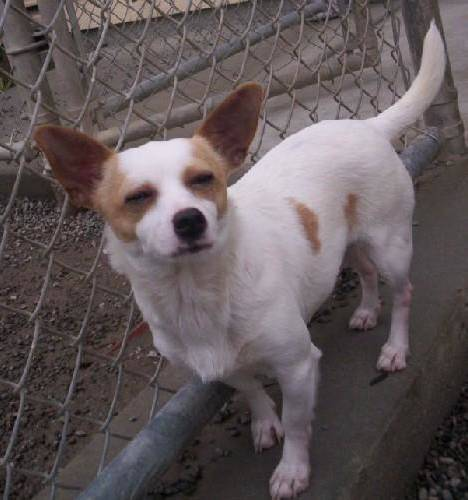

Chihuahua (prob: 0.946) toy_terrier (prob: 0.018) dingo (prob: 0.010) French_bulldog (prob: 0.004) Cardigan (prob: 0.003)


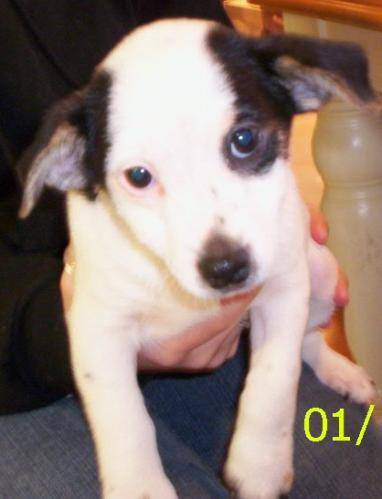

Staffordshire_bullterrier (prob: 0.229) toy_terrier (prob: 0.200) American_Staffordshire_terrier (prob: 0.200) Chihuahua (prob: 0.061) beagle (prob: 0.028)


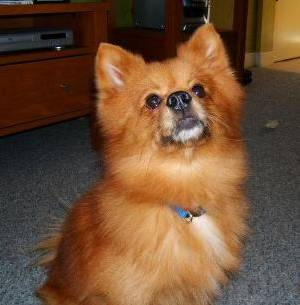

Pomeranian (prob: 0.723) chow (prob: 0.274) keeshond (prob: 0.002) Pekinese (prob: 0.001) Persian_cat (prob: 0.000)


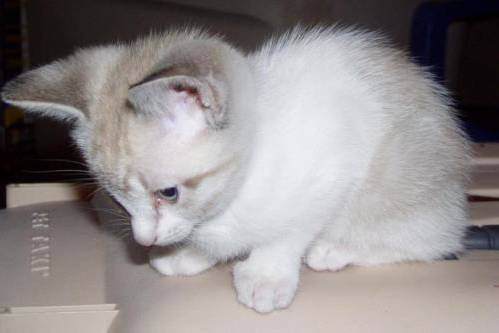

Siamese_cat (prob: 0.254) lynx (prob: 0.249) dishwasher (prob: 0.050) carton (prob: 0.040) Persian_cat (prob: 0.035)


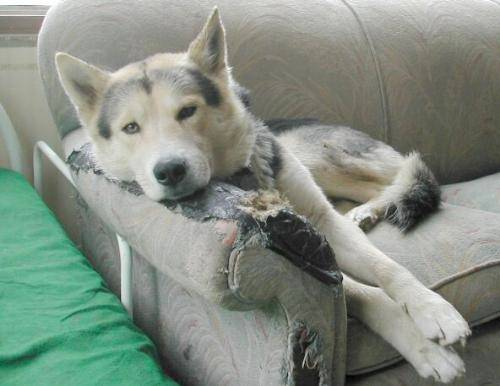

Eskimo_dog (prob: 0.313) Siberian_husky (prob: 0.243) German_shepherd (prob: 0.131) kelpie (prob: 0.075) malamute (prob: 0.059)


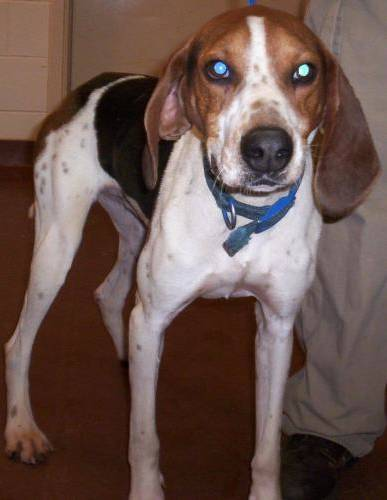

Walker_hound (prob: 0.905) English_foxhound (prob: 0.080) beagle (prob: 0.009) bluetick (prob: 0.004) German_short-haired_pointer (prob: 0.002)


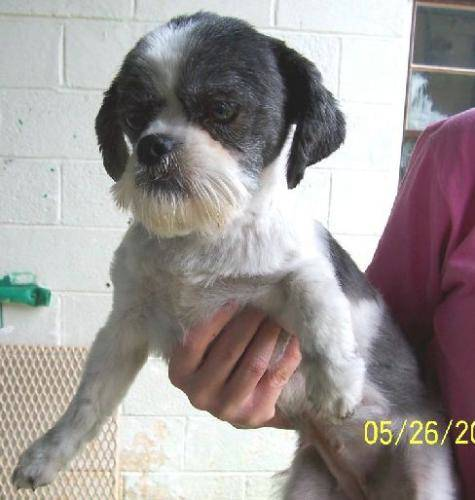

Shih-Tzu (prob: 0.395) Lhasa (prob: 0.130) miniature_schnauzer (prob: 0.084) Tibetan_terrier (prob: 0.058) toy_poodle (prob: 0.022)


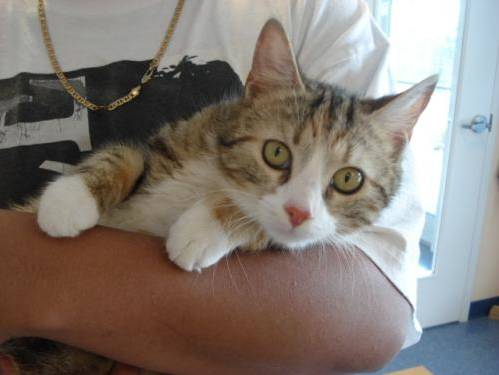

tabby (prob: 0.247) tiger_cat (prob: 0.159) Egyptian_cat (prob: 0.076) laptop (prob: 0.028) lynx (prob: 0.027)


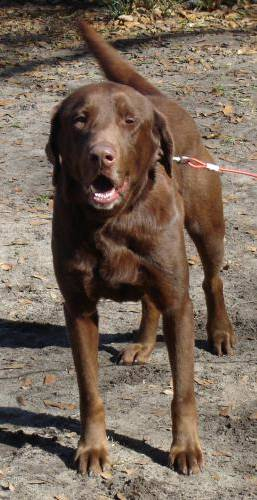

Chesapeake_Bay_retriever (prob: 0.562) Labrador_retriever (prob: 0.281) kelpie (prob: 0.103) American_Staffordshire_terrier (prob: 0.018) Sussex_spaniel (prob: 0.006)


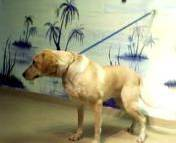

Labrador_retriever (prob: 0.308) golden_retriever (prob: 0.164) Chesapeake_Bay_retriever (prob: 0.091) vizsla (prob: 0.072) Great_Dane (prob: 0.071)


In [9]:
from IPython.display import Image,display

for img_path,dec_pred in zip(all_files[0:n_images],dec_preds):
    display(Image(img_path,width="120px",height="120px"))
    print(" ".join(["%s (prob: %.3f)"%(elm[1],elm[2]) for elm in dec_pred]))

In [10]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 224, 224)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 224, 224)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 112, 112)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

## Using pretrained CNN as *feature extractors*

In [18]:
# load model without top layer
n_images_train=1000
n_images_test=2000
input_image_shape = (3,224,224)
train_features, train_labels,train_files, \
test_features, test_labels, test_files = dvc.training_test_datasets(all_files,
                                                                    n_images_train,n_images_test,
                                                                    input_image_shape)

Loading train set
loading image (1/1000)
loading image (101/1000)
loading image (201/1000)
loading image (301/1000)
loading image (401/1000)
loading image (501/1000)
loading image (601/1000)
loading image (701/1000)
loading image (801/1000)
loading image (901/1000)
Loading test set
loading image (1/2000)
loading image (101/2000)
loading image (201/2000)
loading image (301/2000)
loading image (401/2000)
loading image (501/2000)
loading image (601/2000)
loading image (701/2000)
loading image (801/2000)
loading image (901/2000)
loading image (1001/2000)
loading image (1101/2000)
loading image (1201/2000)
loading image (1301/2000)
loading image (1401/2000)
loading image (1501/2000)
loading image (1601/2000)
loading image (1701/2000)
loading image (1801/2000)
loading image (1901/2000)


In [19]:
# load_img from keras.preprocessing loads the images in [0,255] scale
train_features*=255
test_features*=255
train_features = preprocess_input(train_features)
test_features = preprocess_input(test_features)

In [13]:
from keras.models import Model
base_model = VGG16(weights='imagenet')
model = Model(input=base_model.input, output=base_model.get_layer('fc2').output)

print("Predicting train images")
train_features_cnn = model.predict(train_features,verbose=1)
print("Predicting test images")
test_features_cnn = model.predict(test_features,verbose=1)

Predicting train images
1000/1000 [==============================] - 211s     

In [14]:
train_features_cnn.shape

(1000, 4096)

In [15]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'kernel': ['linear'],
                     'C': [1, 10, 100, 1000]}

clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5,n_jobs=7)
clf.fit(train_features_cnn, train_labels)

clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
print("Train score: {}".format(clf.score(train_features_cnn,train_labels)))
print("Test score: {}".format(clf.score(test_features_cnn,test_labels)))

Train score: 1.0
Test score: 0.976


## *Fine tune* CNN model
With fine tunning here we refer to the process of training the same CNN architecture:
* Using the weights of the *transfered* task (here imagenet classification) as starting points in sgd.
* We let some layers to be *fixed* (i.e. not updating the parameters of them).

In [20]:
base_model = VGG16(weights='imagenet')

model_conv_vgg = Model(input=base_model.input, output=base_model.get_layer('flatten').output)
train_features_convs = model_conv_vgg.predict(train_features,verbose=1)

1000/1000 [==============================] - 205s     

In [21]:
model_conv_vgg.output_shape

(None, 25088)

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import Dense

model_fc_vgg = Sequential([
    Dense(4096, activation='relu', name='fc1',input_dim=train_features_convs.shape[1]),
    Dense(4096, activation='relu', name='fc2'),
    Dense(1, activation='sigmoid', name='predictions_new')
])

# Copy to weights to have them as an initialization
model_fc_vgg.get_layer('fc1').set_weights([w for w in base_model.get_layer("fc1").get_weights()])
model_fc_vgg.get_layer('fc2').set_weights([w for w in base_model.get_layer("fc2").get_weights()])
model_fc_vgg.get_layer('fc1').trainable = False
model_fc_vgg.get_layer('fc2').trainable = True

In [41]:
model_fc_vgg.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
fc1 (Dense)                      (None, 4096)          102764544   dense_input_3[0][0]              
____________________________________________________________________________________________________
fc2 (Dense)                      (None, 4096)          16781312    fc1[0][0]                        
____________________________________________________________________________________________________
predictions_new (Dense)          (None, 1)             4097        fc2[0][0]                        
Total params: 119,549,953
Trainable params: 16,785,409
Non-trainable params: 102,764,544
____________________________________________________________________________________________________


In [42]:
model_fc_vgg.compile(optimizer="adam", 
                     loss='binary_crossentropy',metrics=['accuracy'])

nb_epoch=80
print("Model compiled, start training")
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, 
                                        verbose=0, mode='auto')
history = model_fc_vgg.fit(train_features_convs,
                           train_labels,validation_split=.1,
                           batch_size=32, nb_epoch=nb_epoch,verbose=2,callbacks=[early_stopping_callback])

Model compiled, start training
Train on 900 samples, validate on 100 samples
Epoch 1/80
4s - loss: 0.6014 - acc: 0.9578 - val_loss: 1.0941e-07 - val_acc: 1.0000
Epoch 2/80
4s - loss: 0.4293 - acc: 0.9722 - val_loss: 1.0941e-07 - val_acc: 1.0000
Epoch 3/80
4s - loss: 0.3636 - acc: 0.9756 - val_loss: 0.3463 - val_acc: 0.9700
Epoch 4/80
4s - loss: 1.2467 - acc: 0.9200 - val_loss: 0.1612 - val_acc: 0.9900
Epoch 5/80
4s - loss: 0.4347 - acc: 0.9722 - val_loss: 0.1612 - val_acc: 0.9900
Epoch 6/80
4s - loss: 0.3763 - acc: 0.9756 - val_loss: 0.1594 - val_acc: 0.9900
Epoch 7/80
4s - loss: 0.4669 - acc: 0.9700 - val_loss: 0.7971 - val_acc: 0.9500


In [43]:
# join both models equivalent to:
# results = model_fc_vgg.evaluate(model_conv_vgg.predict(test_features),test_labels)

modelo_junto = model_conv_vgg.output
modelo_junto = model_fc_vgg.get_layer("fc1")(modelo_junto)
modelo_junto = model_fc_vgg.get_layer("fc2")(modelo_junto)
modelo_junto = model_fc_vgg.get_layer("predictions_new")(modelo_junto)

modelo_junto = Model(input=model_conv_vgg.input,output=modelo_junto)
modelo_junto.compile(optimizer="adam", 
                     loss='binary_crossentropy',metrics=['accuracy'])


In [44]:
results = modelo_junto.evaluate(test_features,
                                test_labels)

print(" ".join(["%s: %.4f"%(metric_name,valor) for metric_name,valor in zip(modelo_junto.metrics_names,results)]))

2000/2000 [==============================] - 421s     

References: 
 * https://keras.io/applications/
 * [archiv ResNet50 paper](https://arxiv.org/abs/1512.03385)
 * pyimageresearch blog
 